In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm.autonotebook import tqdm
import pandas as pd

<ipython-input-2-93e2626d8a4a>:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

<ipython-input-3-475911aa0aa9>:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png', 'pdf')


In [4]:
import torch

In [5]:
torch_scalar = torch.tensor(3.14)
torch_vector = torch.tensor([1, 2, 3, 4])
torch_matrix = torch.tensor([[1, 2,],
                             [3, 4,],
                             [5, 6,],
                             [7, 8,]])
#You don't have to format it like I did, thats just for clarity
torch_tensor3d = torch.tensor([
                            [
                            [ 1,  2,  3],
                            [ 4,  5,  6],
                            ],
                            [
                            [ 7,  8,  9],
                            [10, 11, 12],
                            ],
                            [
                            [13, 14, 15],
                            [16, 17, 18],
                            ],
                            [
                            [19, 20, 21],
                            [22, 23, 24],
                            ]
                              ])

In [6]:
print(torch_scalar.shape)
print(torch_vector.shape)
print(torch_matrix.shape)
print(torch_tensor3d.shape)
torch_tensor3d[2, 0, 2]

torch.Size([])
torch.Size([4])
torch.Size([4, 2])
torch.Size([4, 2, 3])


tensor(15)

In [7]:
x_np = np.random.random((4,4))
print(x_np)

[[0.58840827 0.79502295 0.41326122 0.10253403]
 [0.89350468 0.13340359 0.44992615 0.71440392]
 [0.68410467 0.38713376 0.13365928 0.52823574]
 [0.52101685 0.22026002 0.41412315 0.89936777]]


In [8]:
x_pt = torch.tensor(x_np)
print(x_pt)

tensor([[0.5884, 0.7950, 0.4133, 0.1025],
        [0.8935, 0.1334, 0.4499, 0.7144],
        [0.6841, 0.3871, 0.1337, 0.5282],
        [0.5210, 0.2203, 0.4141, 0.8994]], dtype=torch.float64)


In [9]:
print(x_np.dtype, x_pt.dtype)

float64 torch.float64


In [10]:
#Lets force them to be 32-bit floats
x_np = np.asarray(x_np, dtype=np.float32)
x_pt = torch.tensor(x_np, dtype=torch.float32)
print(x_np.dtype, x_pt.dtype, torch.tensor(x_np).dtype)

float32 torch.float32 torch.float32


In [11]:
b_np = (x_np > 0.5)
print(b_np)
print(b_np.dtype)

[[ True  True False False]
 [ True False False  True]
 [ True False False  True]
 [ True False False  True]]
bool


In [12]:
b_pt = (x_pt > 0.5)
print(b_pt)
print(b_pt.dtype)

tensor([[ True,  True, False, False],
        [ True, False, False,  True],
        [ True, False, False,  True],
        [ True, False, False,  True]])
torch.bool


In [13]:
np.sum(x_np)

7.878366

In [14]:
torch.sum(x_pt)

tensor(7.8784)

In [15]:
np.transpose(x_np)

array([[0.5884083 , 0.8935047 , 0.6841047 , 0.52101684],
       [0.79502296, 0.1334036 , 0.38713378, 0.22026002],
       [0.4132612 , 0.44992617, 0.13365927, 0.41412315],
       [0.10253403, 0.7144039 , 0.52823573, 0.89936775]], dtype=float32)

In [16]:
torch.transpose(x_pt, 0, 1)

tensor([[0.5884, 0.8935, 0.6841, 0.5210],
        [0.7950, 0.1334, 0.3871, 0.2203],
        [0.4133, 0.4499, 0.1337, 0.4141],
        [0.1025, 0.7144, 0.5282, 0.8994]])

In [17]:
print(torch.transpose(torch_tensor3d, 0, 2).shape)

torch.Size([3, 2, 4])


In [18]:
import timeit
x = torch.rand(2**11, 2**11)
time_cpu = timeit.timeit("x@x", globals=globals(), number=100)

In [19]:
time_cpu

2.0875361040000087

In [20]:
print("Is CUDA available? :", torch.cuda.is_available())
device = torch.device("cuda")

Is CUDA available? : True


We need to ask torch to move to GPU device. If I were multiplying x by y and y were not on the GPU, it would throw an error

In [22]:
x = x.to(device)
time_gpu = timeit.timeit("x@x", globals=globals(), number=100)
time_gpu

0.0027237880000257064


The line `time_gpu = timeit.timeit("x@x", globals=globals(), number=100)` measures the time it takes to perform the matrix multiplication `x@x` on the GPU 100 times.

The output of the cell shows that the time it takes to perform the matrix multiplication on the GPU is significantly lower than the time it takes to perform it on the CPU. This is because GPUs are specifically designed to handle large-scale matrix operations efficiently.

This code goes through common Python and PyTorch containers and moves every object found onto the specified device

In [23]:
def moveTo(obj, device):
    """
    obj: the python object to move to a device, or to move its contents to a device
    device: the compute device to move objects to
    """
    if isinstance(obj, list):
        return [moveTo(x, device) for x in obj]
    elif isinstance(obj, tuple):
        return tuple(moveTo(list(obj), device))
    elif isinstance(obj, set):
        return set(moveTo(list(obj), device))
    elif isinstance(obj, dict):
        to_ret = dict()
        for key, value in obj.items():
            to_ret[moveTo(key, device)] = moveTo(value, device)
        return to_ret
    elif hasattr(obj, "to"):
        return obj.to(device)
    else:
        return obj

some_tensors = [torch.tensor(1), torch.tensor(2)]
print(some_tensors)
print(moveTo(some_tensors, device))
print(some_tensors)

[tensor(1), tensor(2)]
[tensor(1, device='cuda:0'), tensor(2, device='cuda:0')]
[tensor(1), tensor(2)]


<Axes: >

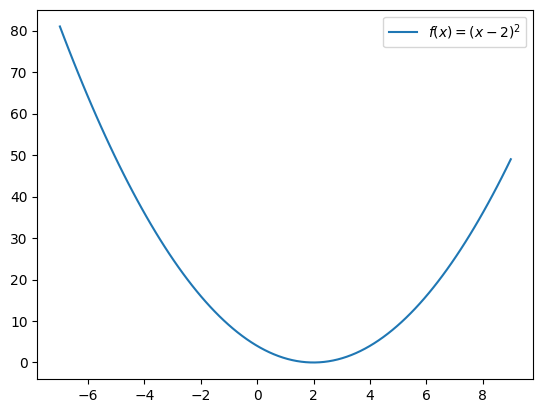

In [24]:
def f(x):
    return torch.pow((x-2.0), 2)

x_axis_vals = np.linspace(-7,9,100)
y_axis_vals = f(torch.tensor(x_axis_vals)).numpy()

sns.lineplot(x=x_axis_vals, y=y_axis_vals, label='$f(x)=(x-2)^2$')

<Axes: >

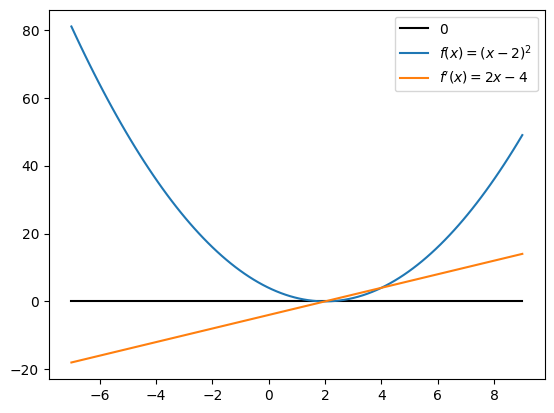

In [25]:
def fP(x): #Defining the derivative of f(x) manually
    return 2*x-4

y_axis_vals_p = fP(torch.tensor(x_axis_vals)).numpy()

#First, lets draw a black line at 0, so that we can easily tell if something is positive or negative
sns.lineplot(x=x_axis_vals, y=[0.0]*len(x_axis_vals), label="0", color='black')
sns.lineplot(x=x_axis_vals, y=y_axis_vals, label='$f(x) = (x-2)^2$')
sns.lineplot(x=x_axis_vals, y=y_axis_vals_p, label="$f'(x)=2 x - 4$")

PyTorch's autograd, or automatic differentiation, is a fundamental component that enables automatic computation of gradients, which are essential for training neural networks. Here's an explanation of how it works and its main concepts:

### Key Concepts

1. **Tensors**: Tensors are the core data structure in PyTorch, similar to NumPy arrays but with additional capabilities. They can run on both CPU and GPU for faster computation.

2. **Requires_grad**: When creating a tensor, you can set `requires_grad=True` to indicate that PyTorch should track all operations on this tensor. This tracking is necessary for gradient computation.

3. **Computational Graph**: When operations are performed on tensors with `requires_grad=True`, PyTorch constructs a computational graph. Each node in the graph represents a tensor, and edges represent functions that produced the tensor from other tensors.

4. **Gradient Calculation**: The `backward()` function computes the gradients of all tensors in the computational graph. These gradients are stored in the `.grad` attribute of the tensors.

### How Autograd Works

1. **Forward Pass**: During the forward pass, PyTorch records the operations performed on tensors to build the computational graph. This graph is dynamic, meaning it's created on-the-fly during the forward pass and can vary with each iteration.

2. **Backward Pass**: When the `backward()` method is called on the loss tensor (typically the output of a neural network), PyTorch traverses the computational graph in reverse order. It uses the chain rule to compute the gradients of the loss with respect to each tensor in the graph.

### Example

Here’s a simple example to illustrate autograd in PyTorch:


In [26]:
# Create tensors
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(3.0, requires_grad=True)

# Define a function
z = x * y + y ** 2

# Compute gradients
z.backward()

# Print gradients
print(x.grad)  # dz/dx
print(y.grad)  # dz/dy

tensor(3.)
tensor(8.)



### Explanation of the Example

1. **Tensor Creation**: `x` and `y` are tensors with `requires_grad=True`, meaning PyTorch will track operations on these tensors.

2. **Function Definition**: `z = x * y + y ** 2` defines a function of `x` and `y`.

3. **Backward Pass**: Calling `z.backward()` computes the gradients of `z` with respect to `x` and `y`.

4. **Gradient Access**: The gradients are stored in `x.grad` and `y.grad`, representing the partial derivatives of `z` with respect to `x` and `y`, respectively.

### Advanced Features

- **Gradient Accumulation**: By default, gradients are accumulated into the `.grad` attribute. This is useful for batch processing, but you must zero out the gradients after each backward pass using `optimizer.zero_grad()`.

- **Detaching from the Graph**: Sometimes, you may want to perform operations without tracking them for gradient computation. You can use `.detach()` to create a new tensor that does not require gradients.

- **Custom Gradients**: You can define custom gradient functions by subclassing `torch.autograd.Function` and implementing the `forward` and `backward` static methods.

PyTorch's autograd provides a flexible and efficient way to handle gradient computations, which is crucial for training neural networks. Its dynamic nature allows for more intuitive debugging and experimentation compared to static computation graphs.

In [27]:
x = torch.tensor([-3.5], requires_grad=True)
print(x.grad)

None


In [28]:
value = f(x)
print(value)

tensor([30.2500], grad_fn=<PowBackward0>)


In [29]:
value.backward()
print(x.grad)

tensor([-11.])


In [30]:
x.data

tensor([-3.5000])

In [ ]:
x = torch.tensor([-3.5], requires_grad=True)

x_cur = x.clone()
x_prev = x_cur*100 #Make the initial "previous" solution larger
epsilon = 1e-5
eta = 0.1

while torch.linalg.norm(x_cur-x_prev) > epsilon:
    x_prev = x_cur.clone() #We need to make a clone here so that x_prev and x_cur don't point to the same object

    #Compute our function, gradient, and update
    value = f(x)
    value.backward()
    x.data -= eta * x.grad
    x.grad.zero_() #We need to zero out the old gradient, as py-torch will not do that for us

    #What are we currently now?
    x_cur = x.data

print(x_cur)

tensor([2.0000])


In PyTorch, the `data` attribute of a tensor is used to access its underlying raw tensor without the gradient tracking and autograd machinery. This can be useful for certain operations where you want to update the tensor values directly but avoid interfering with the computational graph that autograd is constructing.

### Why `x.data`?

In the context of the gradient descent loop, `x.data` is used to directly modify the tensor's value without affecting the computational graph. Here’s why it’s used:

1. **Avoiding Interference with Autograd**:
   - When you perform operations on a tensor with `requires_grad=True`, PyTorch keeps track of these operations to build the computational graph for gradient computation.
   - Directly modifying the tensor (e.g., `x -= eta * x.grad`) would involve PyTorch's autograd machinery and could lead to incorrect gradients or errors.
   - Using `x.data` allows you to bypass the autograd system and modify the raw tensor data directly.

2. **Preventing Gradient Tracking Issues**:
   - If you update the tensor directly without using `data`, PyTorch might incorrectly track this operation as part of the computational graph.
   - This can cause issues in the subsequent backward pass, leading to incorrect gradient calculations or even runtime errors.
   - By using `x.data`, you ensure that the update is not tracked by autograd, maintaining the integrity of the computational graph.

3. **Zeroing Gradients**:
   - After the gradient update, `x.grad.zero_()` is called to zero out the gradients.
   - This is necessary because PyTorch accumulates gradients by default. Zeroing the gradients ensures that the next iteration's gradients are not influenced by previous iterations.

### Key Points

- **Gradient Calculation**:
  - `value.backward()` calculates the gradient of `f` with respect to `x` and stores it in `x.grad`.

- **Parameter Update**:
  - `x.data -= eta * x.grad` updates the raw data of `x` without affecting the computational graph.

- **Zeroing Gradients**:
  - `x.grad.zero_()` ensures that the next backward pass starts with a clean gradient slate.

By using `x.data`, the code ensures that the gradient descent update step does not interfere with PyTorch's autograd system, enabling correct and efficient gradient-based optimization.

Parameters can be used interchangeably with tensors, but we can create an `Optimizer` object with parameters.

This code snippet uses PyTorch's `torch.nn.Parameter` and `torch.optim.SGD` to perform gradient descent optimization. This approach is more aligned with how PyTorch is typically used in neural network training. Here's a detailed explanation:

### Key Components

1. **`torch.nn.Parameter`**:
   - `x_param = torch.nn.Parameter(torch.tensor([-3.5]), requires_grad=True)`
   - `torch.nn.Parameter` is a special kind of tensor that is intended to be used as a parameter in a neural network module. It is automatically registered as a parameter when assigned as an attribute to a `nn.Module`.
   - Here, `x_param` is initialized to -3.5, and `requires_grad=True` indicates that gradients should be computed for it.

2. **Optimizer**:
   - `optimizer = torch.optim.SGD([x_param], lr=eta)`
   - An optimizer is created using stochastic gradient descent (SGD) with the learning rate `eta`.
   - The optimizer is given a list of parameters to optimize, in this case, `[x_param]`.

3. **Training Loop**:
   - This loop runs for 60 epochs (iterations).
   - In each iteration:
     1. **Zero Gradients**:
        - `optimizer.zero_grad()` clears the old gradients. This is equivalent to `x.grad.zero_()` in the manual approach.
     2. **Compute Loss**:
        - `loss_incurred = f(x_param)` evaluates the function \( f(x) \) at the current value of `x_param`.
     3. **Backward Pass**:
        - `loss_incurred.backward()` computes the gradient of the loss with respect to `x_param` and stores it in `x_param.grad`.
     4. **Optimizer Step**:
        - `optimizer.step()` updates `x_param` using the computed gradients. This is equivalent to `x.data -= eta * x.grad` in the manual approach.

- **Parameter Management**: Using `torch.nn.Parameter` automatically registers the tensor as a parameter.
- **Optimizers**: `torch.optim.SGD` provides an easy-to-use interface for implementing gradient descent and other optimization algorithms.
- **Gradient Management**: The optimizer handles gradient zeroing and parameter updates, reducing the likelihood of errors and making the code cleaner and more modular.


In [ ]:
x_param = torch.nn.Parameter(torch.tensor([-3.5]), requires_grad=True)
optimizer = torch.optim.SGD([x_param], lr=eta)
for epoch in range(60):
    optimizer.zero_grad() #x.grad.zero_()
    loss_incurred  = f(x_param)
    loss_incurred.backward()
    optimizer.step() #x.data -= eta * x.grad
print(x_param.data)

In [35]:
from torch.utils.data import Dataset
from sklearn.datasets import fetch_openml

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print(X.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)


In [39]:
X = X.to_numpy()
y = y.to_numpy()

In [40]:
class SimpleDataset(Dataset):

    def __init__(self, X, y):
        super(SimpleDataset, self).__init__()
        self.X = X
        self.y = y

    def __getitem__(self, index):
        #This "work" could have gone in the constructor, but you should get into
        inputs = torch.tensor(self.X[index,:], dtype=torch.float32)
        targets = torch.tensor(int(self.y[index]), dtype=torch.int64)
        return inputs, targets

    def __len__(self):
        return self.X.shape[0]
#Now we can make a PyTorch dataset
dataset = SimpleDataset(X, y)

Let's break down the code step-by-step to understand its purpose and functionality:

### Step-by-Step Explanation

1. **Importing Required Libraries**:
   ```python
   from torch.utils.data import Dataset
   from sklearn.datasets import fetch_openml
   ```
   - `Dataset` from `torch.utils.data` is an abstract class representing a dataset, which can be subclassed to create custom datasets.

2. **Creating a Custom Dataset Class**:
   ```python
   class SimpleDataset(Dataset):
        
       def __init__(self, X, y):
           super(SimpleDataset, self).__init__()
           self.X = X
           self.y = y
       
       def __getitem__(self, index):
           inputs = torch.tensor(self.X[index,:], dtype=torch.float32)
           targets = torch.tensor(int(self.y[index]), dtype=torch.int64)
           return inputs, targets

       def __len__(self):
           return self.X.shape[0]
   ```
   - `SimpleDataset` is a custom dataset class that subclasses `torch.utils.data.Dataset`.
   
   **Constructor (`__init__` method)**:
   - `__init__(self, X, y)` initializes the dataset with data (`X`) and labels (`y`).
   - `super(SimpleDataset, self).__init__()` calls the constructor of the base `Dataset` class.
   - `self.X` and `self.y` store the data and labels.
   
   **Getting a Data Sample (`__getitem__` method)**:
   - `__getitem__(self, index)` retrieves a single data sample and its corresponding label.
   - `inputs = torch.tensor(self.X[index, :], dtype=torch.float32)` converts the data sample at the given `index` to a PyTorch tensor of type `float32`.
   - `targets = torch.tensor(int(self.y[index]), dtype=torch.int64)` converts the label at the given `index` to a PyTorch tensor of type `int64`.
   - The method returns a tuple `(inputs, targets)` containing the data sample and its label.
   
   **Getting the Dataset Size (`__len__` method)**:
   - `__len__(self)` returns the number of samples in the dataset, which is `self.X.shape[0]`.

3. **Creating a Dataset Instance**:
   ```python
   dataset = SimpleDataset(X, y)
   ```
   - An instance of `SimpleDataset` is created with the loaded MNIST data (`X`) and labels (`y`).
   - This instance can now be used with PyTorch's data loading utilities, such as `DataLoader`, to facilitate batching, shuffling, and parallel data loading.

### Summary

The code defines a custom PyTorch dataset for the MNIST dataset. It leverages PyTorch's `Dataset` class to create a simple interface for accessing the data samples and their corresponding labels. This custom dataset can be used with PyTorch's data loading utilities to efficiently handle data during training and evaluation of machine learning models.

### Additional Notes

- **Data Loading Utilities**:
  You can use `torch.utils.data.DataLoader` to load data from this dataset in mini-batches, shuffle the data, and use multiple worker processes for parallel data loading:
  ```python
  from torch.utils.data import DataLoader

  dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=2)
  for inputs, targets in dataloader:
      # Training code here
      pass
  ```
- **Transforms**:
  You might want to add data preprocessing or augmentation steps. This can be done using `torchvision.transforms`.

In [41]:
print("Length: ", len(dataset))
example, label = dataset[0]
print("Features: ", example.shape) #Will return 784
print("Label of index 0: ", label)

Length:  70000
Features:  torch.Size([784])
Label of index 0:  tensor(5)


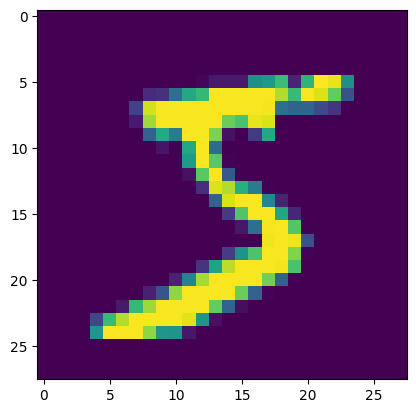

In [42]:
plt.imshow(example.reshape((28,28)))

In [43]:
train_size = int(len(dataset)*0.8)
test_size = len(dataset)-train_size

train_dataset, test_dataset = torch.utils.data.random_split(dataset, (train_size, test_size))
print("{} examples for training and {} for testing".format(len(train_dataset), len(test_dataset)))

56000 examples for training and 14000 for testing
